Aplicação da Regressão Linear (Mercado Financeiro)

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [14]:
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

del data["Dividends"]
del data["Stock Splits"]

data.dropna()

data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-05 00:00:00-03:00,14.253601,14.318647,14.023775,14.249266,17375800
2022-07-06 00:00:00-03:00,14.171213,14.344668,13.963068,14.158204,21683600
2022-07-07 00:00:00-03:00,14.288294,14.479093,14.288294,14.366348,19425200
2022-07-08 00:00:00-03:00,14.383694,14.587504,14.335996,14.505114,17998200
2022-07-11 00:00:00-03:00,14.366348,14.444403,14.201566,14.266612,14107400


In [15]:
# Definindo correlação 

correlacao = pd.DataFrame(data)

correlacao_aplicada = correlacao.corr()

# Definindo X e y
X = data['Open'].values
y = data['High'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

correlacao_aplicada

,Open,High,Low,Close,Volume
Open,1.000000,0.999056,0.998918,0.997734,-0.382393
High,0.999056,1.000000,0.998931,0.999058,-0.369339
Low,0.998918,0.998931,1.000000,0.999114,-0.393229
Close,0.997734,0.999058,0.999114,1.000000,-0.379693
Volume,-0.382393,-0.369339,-0.393229,-0.379693,1.000000


Text(0, 0.5, 'High')

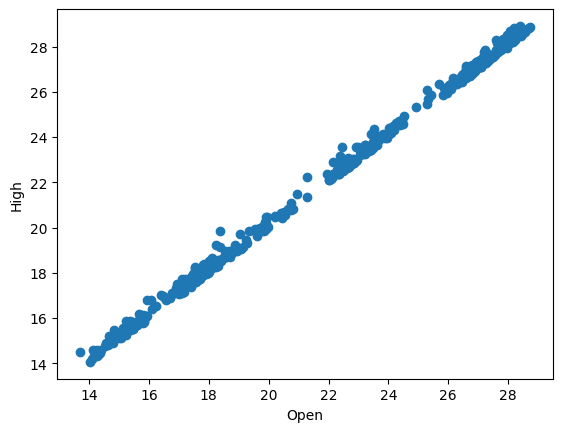

In [16]:
# Mostrar o espalhamento dos dados

plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('High')

In [17]:
# Treinamento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# Normalizando os dados

# x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# X_train_scaled = x_scaler.fit_transform(X_train)
# X_test_scaled = x_scaler.fit_transform(X_test)
# y_train_scaled = y_scaler.fit_transform(y_train)
# y_test_scaled = y_scaler.fit_transform(y_test)

In [19]:
# Calculo da Regressão Linear

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [20]:
# Realizar Previsões

y_pred = modelo_regressao.predict(X_test)
y_pred

array([[16.18779064],
       [23.18569024],
       [22.65977167],
       [27.6756344 ],
       [24.04279246],
       [15.59459901],
       [28.6322001 ],
       [22.57468404],
       [19.30681926],
       [17.77725041],
       [24.41702736],
       [23.65210267],
       [22.60875699],
       [28.62273029],
       [17.96848506],
       [22.60300561],
       [27.35507797],
       [28.3621316 ],
       [18.38907689],
       [18.20798586],
       [19.84899827],
       [26.65673799],
       [23.74538877],
       [15.90061728],
       [17.81756721],
       [28.26331679],
       [15.97013414],
       [27.64649221],
       [15.51006342],
       [22.59844542],
       [27.55420908],
       [15.54717646],
       [15.50283986],
       [18.29250874],
       [26.35889676],
       [26.17634883],
       [22.8040932 ],
       [27.1413748 ],
       [22.66923314],
       [23.45154369],
       [23.50919771],
       [17.67441877],
       [27.04423579],
       [20.63409213],
       [19.29271328],
       [14

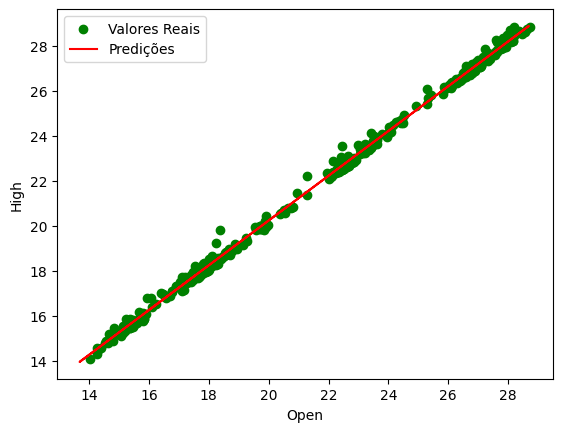

In [21]:
# Grafico Valores Reais x Predições
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [22]:
# Calculando métricas de avaliação usando os valores na escala original
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9984185697737796
Erro Percentual Absoluto Médio (MAPE): 0.6582171907407903%
Erro Médio Absoluto (MAE): 0.1366145016087019
Erro Quadrático Médio (MSE): 0.032118852900747716


In [23]:
# Últimos valores conhecidos
last_known_high = data.iloc[-1]['Open'].reshape(1, -1)  # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_regressao.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Predicted prices for the next 3 days:', predicted_prices_high)

Predicted prices for the next 3 days: [array([27.0586527]), array([27.26635224]), array([27.47310336])]
